In [4]:
from scipy.io import arff
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import MetricFunctions

In [5]:
data, meta = arff.loadarff('dataset.arff')
df = pd.DataFrame(data)
for column in df.columns:
    df[column] = df[column].str.decode('utf-8').astype(int)
X = df.drop('Result', axis=1)
y = df['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [6]:
rf_classifier = RandomForestClassifier()


param_grid = {
    'n_estimators': [int(x) for x in range(10, 210, 10)],
    'max_depth': [None] + [int(x) for x in range(10, 110, 10)],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(
    rf_classifier,
    param_distributions=param_grid,
    n_iter=100,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    random_state=42
)

In [7]:
random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90, 100],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120, 130, 140, 150,
                                                         160, 170, 180, 190,
                                                         200]},
                   random_state=42, scoring='accuracy')

In [8]:
print("Best Parameters: ", random_search.best_params_)
print("Best Accuracy: ", random_search.best_score_)

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)
y_score = y_prob[:, 1]

Best Parameters:  {'n_estimators': 90, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 70, 'bootstrap': False}
Best Accuracy:  0.9709407109367207


In [9]:
MetricFunctions.printAccuracy(best_model, X_train, X_test, y_train, y_test)
MetricFunctions.printLoss(best_model, X_train, X_test, y_train, y_test)

Test accuracy: 96.79%
Train accuracy: 99.04%
Test Log Loss: 0.07842710867607303
Train Log Loss: 0.031687217806408915


In [10]:
MetricFunctions.printAUCandPvalues(y_test, y_score)

AUC-ROC: 0.9965868742602811
P-value: 0.006826251479437717


In [11]:
MetricFunctions.printAUCPRandF1Scores(y_test, y_pred, y_score)

AUC-PR: 0.9973366259678381
F1 Score: 0.9719034428175701


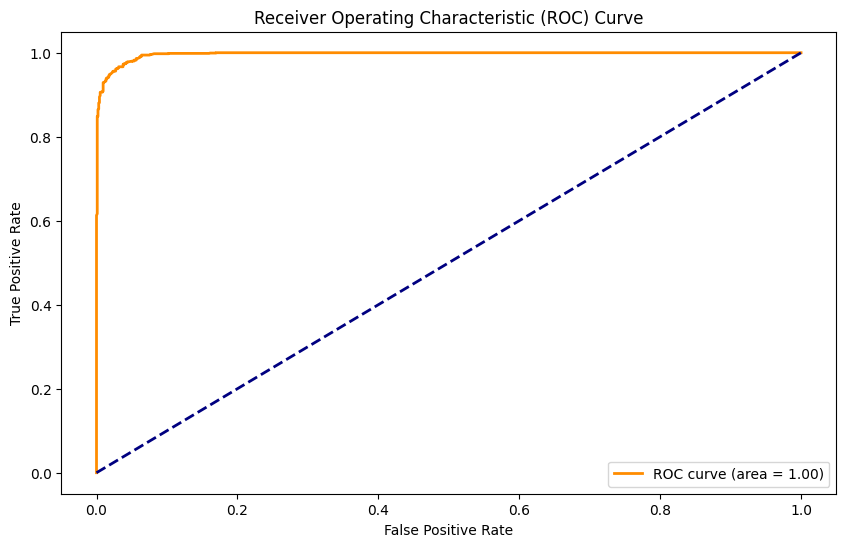

In [12]:
MetricFunctions.plotROCCurve(y_test, y_score)

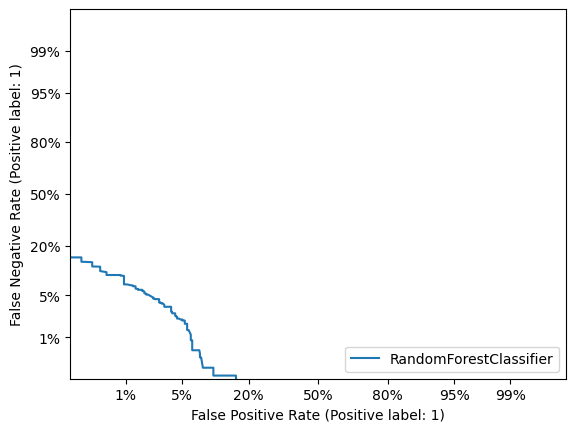

In [13]:
MetricFunctions.plotDetCurve(best_model, X_test, y_test)

Confusion Matrix:
[[ 912   44]
 [  27 1228]]


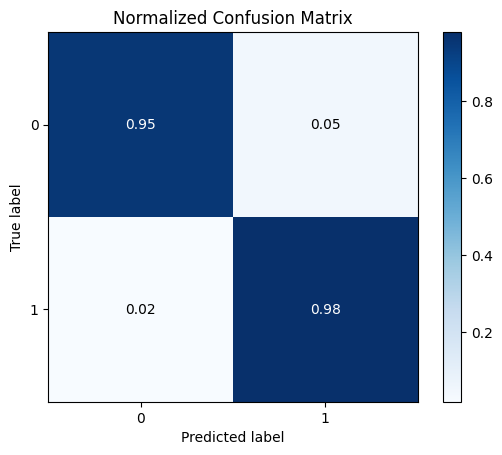

In [14]:
MetricFunctions.printConfMatrix(y_test, y_pred)
MetricFunctions.plotConfMatrix(y_test, y_pred)

C:\Users\Vilius\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


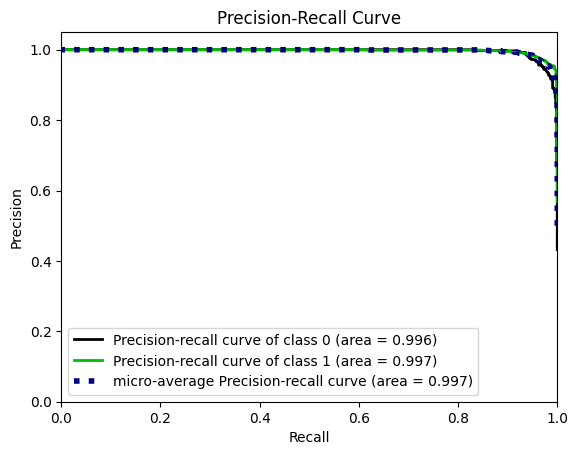

In [15]:
MetricFunctions.plotPrecisionRecallCurve(y_test, y_prob)

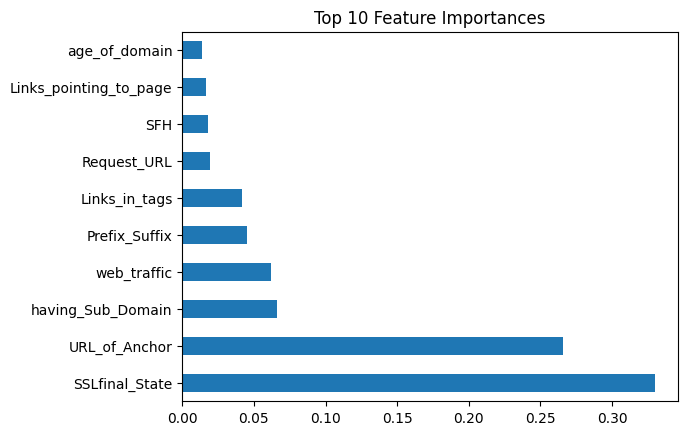

In [16]:
MetricFunctions.plotFeatureImportance(best_model, X)